In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./model/test_images/images.jpg')
img.shape

(3390, 5085, 3)

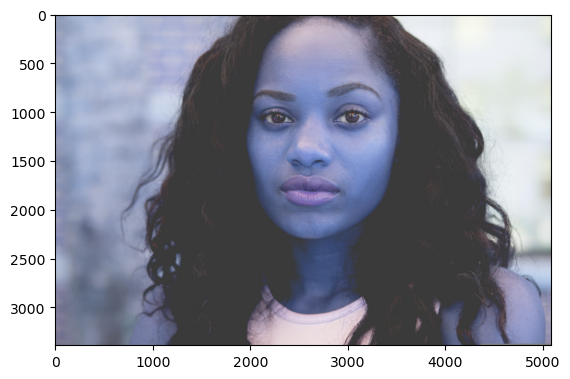

In [4]:
plt.imshow(img) #You are facing this issue since you are reading the image with opencv and opencv reads and displays an image as BGR format instead of RGB color format. Whereas matplotlib uses RGB color format to display image

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[165, 164, 168, ..., 222, 223, 224],
       [164, 161, 168, ..., 222, 223, 223],
       [163, 168, 167, ..., 222, 222, 222],
       ...,
       [115, 132, 124, ..., 128, 128, 128],
       [130, 138, 121, ..., 128, 128, 128],
       [131, 127, 126, ..., 128, 128, 128]], dtype=uint8)

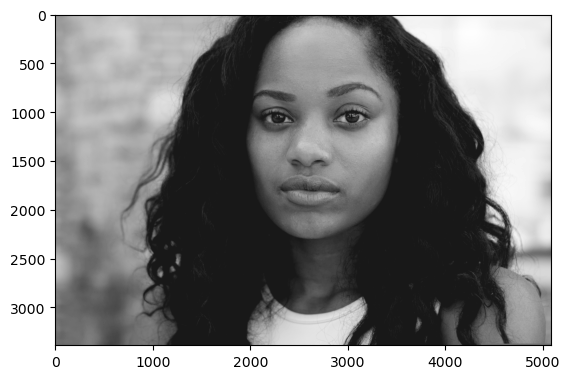

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

faces

array([[1667,  281, 1970, 1970]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(1667, 281, 1970, 1970)

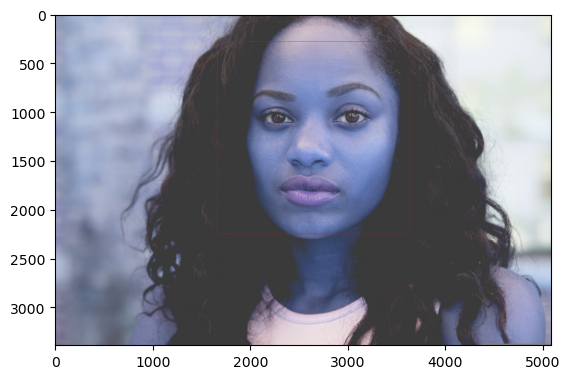

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#(255,255,0)is a colour and it is yellow
plt.imshow(face_img)

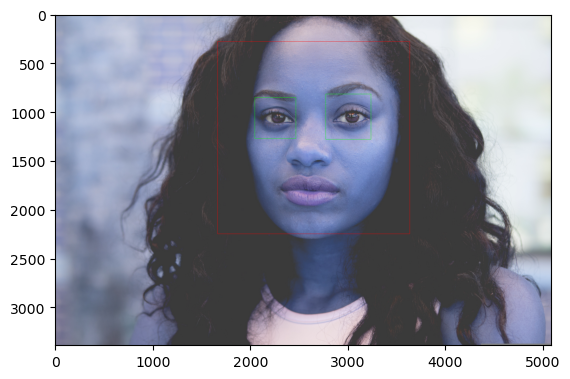

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [11]:
eyes

array([[1108,  538,  464,  464],
       [ 381,  573,  421,  421]])

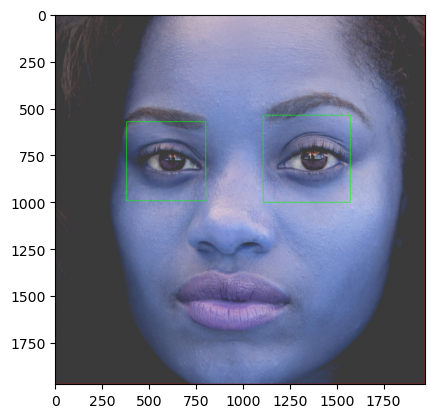

In [12]:
plt.imshow(roi_color, cmap='gray')


In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape #roi=regeion of interset

(1970, 1970, 3)

In [14]:
 def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
          

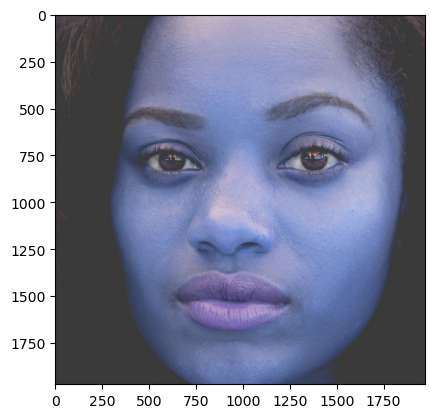

In [15]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./model/test_images/images.jpg')
plt.imshow(cropped_image_no_2_eyes)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./model/test_images/images1.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data="./model/dataset/"

path_to_cr_data="./model/dataset/cropped/"

In [18]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
path_to_data1="./model/dataset"
img_dirs1 = []
for entry in os.scandir(path_to_data1):
    if entry.is_dir():
        img_dirs1.append(entry.path)


In [20]:
img_dirs1

['./model/dataset\\cropped',
 './model/dataset\\lionel_messi',
 './model/dataset\\maria_sharapova',
 './model/dataset\\roger_federer',
 './model/dataset\\serena_williams',
 './model/dataset\\virat_kohli']

In [21]:
img_dirs

['./model/dataset/cropped',
 './model/dataset/lionel_messi',
 './model/dataset/maria_sharapova',
 './model/dataset/roger_federer',
 './model/dataset/serena_williams',
 './model/dataset/virat_kohli']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)#means if exist delete it 
os.mkdir(path_to_cr_data)#means make directory

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./model/dataset/cropped/lionel_messi
Generating cropped images in folder:  ./model/dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./model/dataset/cropped/roger_federer
Generating cropped images in folder:  ./model/dataset/cropped/serena_williams
Generating cropped images in folder:  ./model/dataset/cropped/virat_kohli


In [24]:
#feature engineering
#wavelet transform is very effective to do so

In [25]:
#thanks to stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

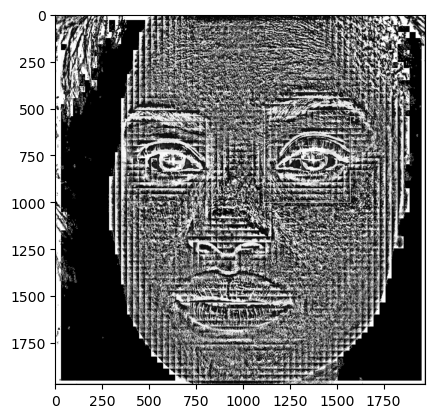

In [26]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [27]:
#Generating number to celebrity
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [28]:
X, y = [], []#very imp ready to do ml ,x and y are important
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image) 
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))#throw error if img is emepty so above line is introduced
        img_har = w2d(img,'db1',5)#w2d function from above  
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)#just alist of images
        y.append(class_dict[celebrity_name])#we cant give diretly name we generate numbers 

In [30]:
len(X)


163

In [31]:
32*32*3 + 32*32


4096

In [32]:
len(X[0])

4096

In [33]:
y[0]

1

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape#WE MADE IT FLOAT BECOME WHEN WE Train our model we may get error

(163, 4096)

In [35]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [36]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [37]:
#our X and y are ready now to go!!!!!!!!!!!!!!

In [38]:
#we deleted some photos thats why we are revising it again ""celebrity_file_names_dict""
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./model/dataset/cropped/lionel_messi\\lionel_messi1.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi10.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi11.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi13.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi14.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi15.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi16.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi17.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi18.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi19.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi2.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi20.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi22.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi23.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi24.png',
  './model/dataset/cropped/lionel_messi\\lionel_messi25.

In [39]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
 #!pip install threadpoolctl

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)#how can we know c=10 gives the best result 
pipe.score(X_test, y_test)

0.8536585365853658

In [42]:
#i got 85.3 accuracy even without neral network

In [43]:
len(X_test)

41

In [44]:
print(classification_report(y_test, pipe.predict(X_test)))
#recall-

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.91      0.91      0.91        11
           3       0.67      0.80      0.73         5
           4       0.83      0.71      0.77         7
           5       0.82      0.90      0.86        10

    accuracy                           0.85        41
   macro avg       0.85      0.84      0.84        41
weighted avg       0.86      0.85      0.86        41



In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.828333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.706000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.885333,{'logisticregression__C': 1}


In [48]:
# The above is Best_Score is on validation set

In [49]:
best_estimators #It a dictionary.......

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_test,y_test)


0.8536585365853658

In [51]:
#now above is accuracy on test_data

In [52]:
best_estimators['random_forest'].score(X_test,y_test)


0.6829268292682927

In [53]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.8536585365853658

In [54]:
best_clf = best_estimators['logistic_regression']


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  0,  1,  0],
       [ 0, 10,  1,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  1,  1,  5,  0],
       [ 1,  0,  0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

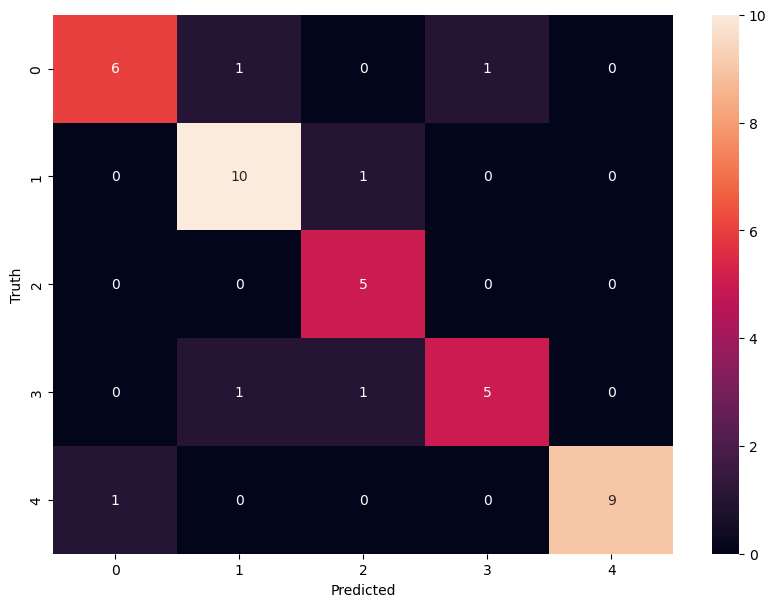

In [56]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [58]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))